In [4]:
import pandas as pd
import numpy as np
import sqlite3 as sql_client
import matplotlib
import matplotlib.pyplot as plt

In [7]:
SQL_DB_FILE_PATH='../FPA_FOD_20170508.sqlite'
connection = sql_client.connect(SQL_DB_FILE_PATH)

### STUDY THE STATES INDIVIDUALLY

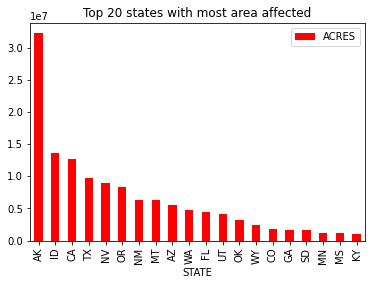

In [8]:
fire_size = pd.read_sql_query("SELECT SUM(FIRE_SIZE) AS ACRES, STATE FROM Fires GROUP BY STATE ORDER BY ACRES DESC;", connection)
fire_size = fire_size.set_index("STATE").iloc[:20].plot(kind="bar", color='red',title='Top 20 states with most area affected')
plt.savefig("acres_fire_size_per_state.png")

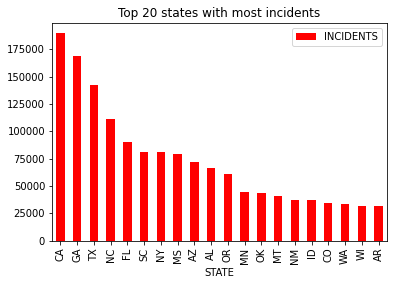

In [9]:
fire_size = pd.read_sql_query("SELECT COUNT(OBJECTID) AS INCIDENTS, STATE FROM Fires GROUP BY STATE ORDER BY INCIDENTS DESC;", connection)
fire_size = fire_size.set_index("STATE").iloc[:20].plot(kind="bar", color='red',title='Top 20 states with most incidents')
plt.savefig("acres_fire_size_per_state.png")

### A STUDY ON CALIFORNIA

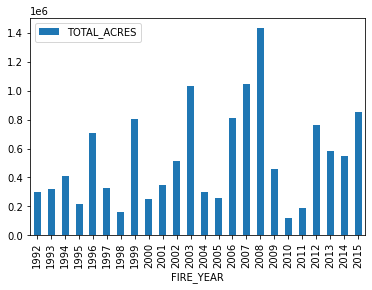

In [10]:
CA_fire_size = pd.read_sql_query("SELECT SUM(FIRE_SIZE) AS TOTAL_ACRES, State, FIRE_YEAR FROM Fires WHERE State='CA' GROUP BY FIRE_YEAR;", connection)
CA_fire_size.set_index("FIRE_YEAR").plot(kind="bar");

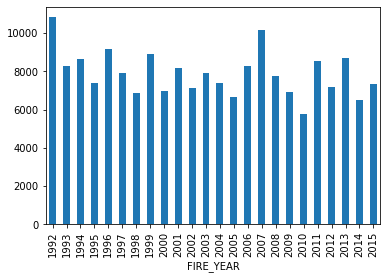

In [11]:
CA_incidents = pd.read_sql_query("SELECT COUNT(OBJECTID) AS COUNT_INCIDENTS, State, FIRE_YEAR FROM Fires WHERE State='CA' GROUP BY FIRE_YEAR;", connection)
CA_incidents.set_index("FIRE_YEAR")["COUNT_INCIDENTS"].plot(kind="bar");



### AREA DESTROYED BY THE FIRES OVER THE YEARS


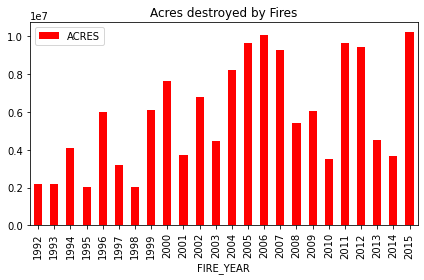

In [12]:
df = pd.read_sql_query("SELECT SUM(FIRE_SIZE) AS ACRES, FIRE_YEAR FROM Fires GROUP BY FIRE_YEAR;", connection)
df.set_index("FIRE_YEAR").plot(kind="bar", color='red', title='Acres destroyed by Fires');
plt.tight_layout()
plt.savefig("area_fire_size_over_years.png")

### UNDERSTANDING THE MONTH WISE BREAK DOWN - find whether fires are more during a particular season


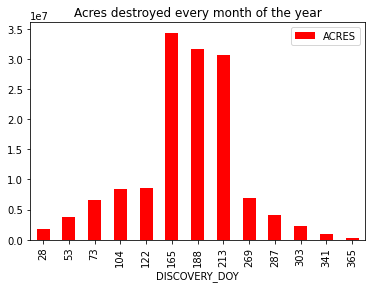

In [13]:
df = pd.read_sql_query("SELECT SUM(FIRE_SIZE) AS ACRES, DISCOVERY_DOY FROM Fires GROUP BY DISCOVERY_DOY/30;", connection)

df.set_index("DISCOVERY_DOY").plot(kind="bar", color='red', title='Acres destroyed every month of the year');

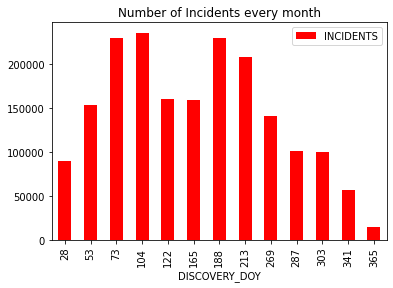

In [15]:
df = pd.read_sql_query("SELECT COUNT(OBJECTID) AS INCIDENTS, DISCOVERY_DOY FROM Fires GROUP BY DISCOVERY_DOY/30;", connection)

df.set_index("DISCOVERY_DOY").plot(kind="bar", color='red', title='Number of Incidents every month');

### AGGREGATE OF HOW LONG THE FIRES BURNT

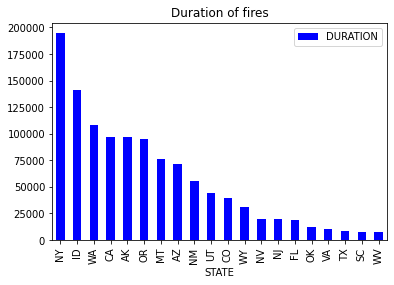

In [16]:
df = pd.read_sql_query("""
SELECT SUM(julianday(cont_date) - julianday(discovery_date)) AS DURATION, STATE FROM Fires 
WHERE CONT_DATE IS NOT NULL AND DISCOVERY_DATE IS NOT NULL AND STATE != "undefined" 
GROUP BY STATE ORDER BY DURATION DESC;
""", connection)
df.set_index("STATE").iloc[:20].plot.bar(color='blue', title='Duration of fires');


### Further analysis on how long the fire burnt how much area

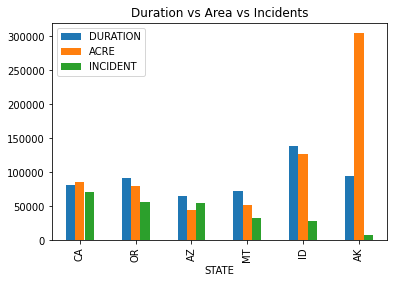

In [17]:
df = pd.read_sql_query("""
SELECT SUM(julianday(cont_date) - julianday(discovery_date)) AS DURATION, SUM(FIRE_SIZE/100) AS ACRE, 
COUNT(OBJECTID) AS INCIDENT, STATE FROM Fires 
WHERE CONT_DATE IS NOT NULL AND DISCOVERY_DATE IS NOT NULL AND STAT_CAUSE_DESCR != "Miscellaneous"
GROUP BY STATE 
HAVING ACRE > 40000 AND DURATION > 25000
ORDER BY INCIDENT DESC, ACRE DESC, DURATION DESC;
""", connection)
df.set_index("STATE").iloc[:10].plot.bar(title='Duration vs Area vs Incidents');

### STATE WISE AGGREGATE WITHOUT MISC REASONS

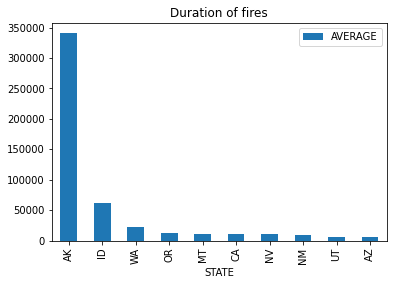

In [19]:
df = pd.read_sql_query("""
SELECT SUM(julianday(cont_date) - julianday(discovery_date))*SUM(FIRE_SIZE/1000)/COUNT(OBJECTID) AS AVERAGE,
STATE FROM Fires 
WHERE CONT_DATE IS NOT NULL AND DISCOVERY_DATE IS NOT NULL 
GROUP BY STATE 
ORDER BY AVERAGE DESC;
""", connection)
df.set_index("STATE").iloc[:10].plot.bar(title='Duration of fires');

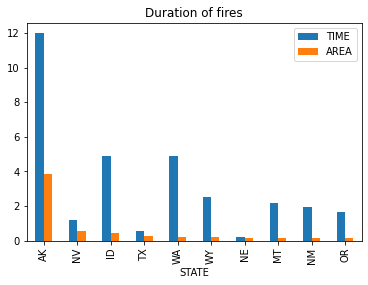

In [20]:
df = pd.read_sql_query("""
SELECT SUM(julianday(cont_date) - julianday(discovery_date))/COUNT(OBJECTID) AS TIME, SUM(FIRE_SIZE/1000)/COUNT(OBJECTID) AS AREA,
STATE FROM Fires 
WHERE CONT_DATE IS NOT NULL AND DISCOVERY_DATE IS NOT NULL AND STAT_CAUSE_DESCR != "Miscellaneous"
GROUP BY STATE 
ORDER BY AREA DESC, TIME DESC;
""", connection)
df.set_index("STATE").iloc[:10].plot(kind = 'bar', title='Duration of fires');

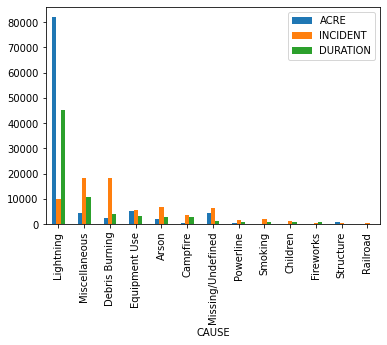

In [23]:
df = pd.read_sql_query(""" SELECT STAT_CAUSE_DESCR AS CAUSE, SUM(FIRE_SIZE/100) AS ACRE,COUNT(*) AS INCIDENT, SUM(julianday(cont_date) - julianday(discovery_date)) AS DURATION  FROM fires WHERE FIRE_YEAR='2015' GROUP BY CAUSE ORDER BY DURATION DESC,INCIDENT DESC,ACRE DESC""", connection)
df.set_index("CAUSE").plot(kind='bar')

### Metric to find the state with slowest response to fires

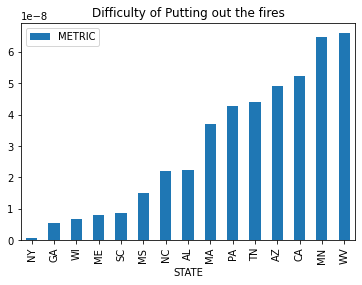

In [21]:
df = pd.read_sql_query("""
SELECT ((SUM(FIRE_SIZE)*100)/(SUM(julianday(cont_date)) - julianday(discovery_date)))/COUNT(OBJECTID) AS METRIC,
STATE FROM Fires 
WHERE CONT_DATE IS NOT NULL AND DISCOVERY_DATE IS NOT NULL 
GROUP BY STATE 
ORDER BY METRIC;
""", connection)
df.set_index("STATE").iloc[:15].plot(kind = 'bar', title='Difficulty of Putting out the fires');

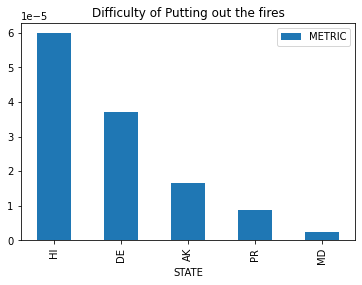

In [22]:
df = pd.read_sql_query("""
SELECT ((SUM(FIRE_SIZE)*100)/(SUM(julianday(cont_date)) - julianday(discovery_date)))/COUNT(OBJECTID) AS METRIC,
STATE FROM Fires 
WHERE CONT_DATE IS NOT NULL AND DISCOVERY_DATE IS NOT NULL 
GROUP BY STATE 
ORDER BY METRIC DESC;
""", connection)
df.set_index("STATE").iloc[:5].plot(kind = 'bar', title='Difficulty of Putting out the fires');

### Analysis on causes of the fires

In [24]:
df = pd.read_sql_query("""
SELECT COUNT(OBJECTID) AS INCIDENTS, SUM(FIRE_SIZE) AS ACRES, STAT_CAUSE_DESCR AS CAUSE FROM Fires GROUP BY CAUSE ORDER BY ACRES DESC;
""", connection)
df

,INCIDENTS,ACRES,CAUSE
0,278468,8.703350e+07,Lightning
1,323805,1.439420e+07,Miscellaneous
2,281455,9.487274e+06,Arson
3,166723,8.751725e+06,Missing/Undefined
4,147612,6.799046e+06,Equipment Use
5,429028,5.975793e+06,Debris Burning
6,76139,3.429061e+06,Campfire
7,14448,1.609443e+06,Powerline
8,33455,8.496138e+05,Railroad
9,52869,8.426605e+05,Smoking


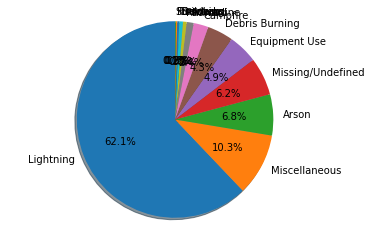

In [25]:
df = pd.read_sql_query("""
SELECT SUM(FIRE_SIZE) AS ACRES, STAT_CAUSE_DESCR AS CAUSE FROM Fires GROUP BY CAUSE ORDER BY ACRES DESC;
""", connection)
labels = df['CAUSE']
values = df['ACRES']
fig1, ax1 = plt.subplots()
ax1.pie(values,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [26]:
import folium
from folium import plugins
from folium.plugins import HeatMap

df = pd.read_sql_query("SELECT LATITUDE, LONGITUDE, FIRE_YEAR, FIRE_SIZE FROM Fires;", connection)
heat_df = df[["LATITUDE","LONGITUDE", "FIRE_YEAR", "FIRE_SIZE"]]
heat_df = heat_df[heat_df["FIRE_SIZE"] > 1800] 
heat_df = heat_df.dropna(axis=0, subset=["LATITUDE","LONGITUDE"])
heat_data = [[row["LATITUDE"],row["LONGITUDE"]] for index, row in heat_df.iterrows()]
del heat_df

map_ = folium.Map(location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()],
                    tiles = "Stamen Terrain",                    
                    zoom_start = 3) 

HeatMap(heat_data, min_opacity=.4, max_val=.8).add_to(map_)

map_

